In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/smsspamcollection (1) .tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# check null values in dataset
df.isnull().sum()
# no null values in dataset

,0
label,0
message,0
length,0
punct,0


In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [5]:
# check no. of ham and spam
df['label'].value_counts()

,count
label,
ham,4825
spam,747


Balancing the data

In [6]:
# select ham data
ham=df[df['label']=='ham']
ham.shape

(4825, 4)

In [7]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
# select spam data
spam=df[df['label']=='spam']
spam.shape   # output = no of samples in spam data

(747, 4)

In [9]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
# now we have to select 747 samples from ham to balance the data
ham=ham.sample(spam.shape[0])


In [11]:
ham.shape

(747, 4)

In [12]:
# check the shape of data
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
## append ham data into spam data
data = pd.concat([ham, spam], ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Your account has been refilled successfully by...,174,16
1,ham,True. Its easier with her here.,31,2
2,ham,East coast,10,0
3,ham,I'm hungry buy smth home...,27,4
4,ham,Are you this much buzy,22,0


In [14]:
data.shape

(1494, 4)

Data Visualization

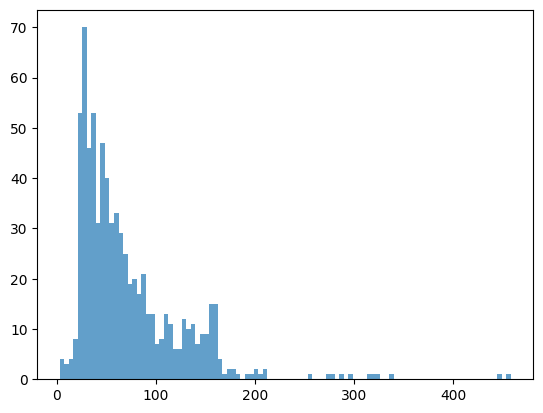

In [16]:
# plot histogram of length for ham messages
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.show()
# from the histogram we can say that, the number of characters in ham message

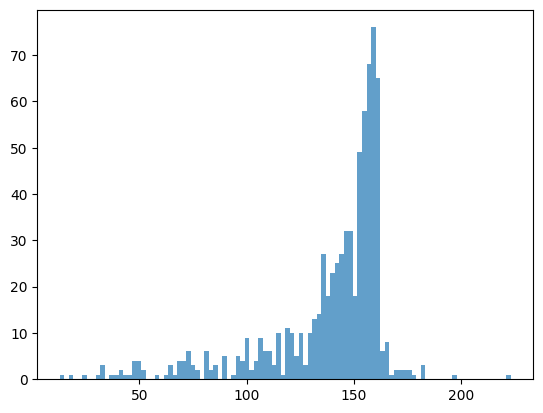

In [17]:
# plot histogram of length for spam messages
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()
# from the histogram we can say that, the number of characters in spam message

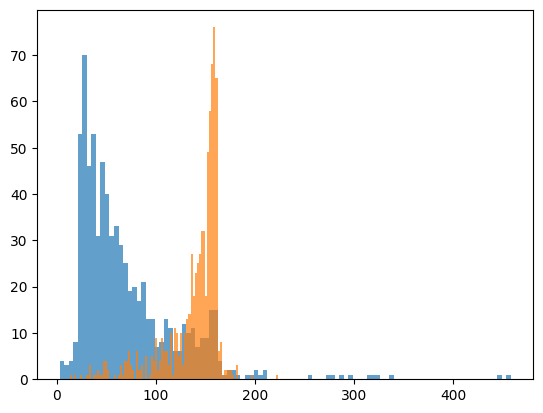

In [18]:
# plot histogram of length for ham messages
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()
# from the histogram we can say that, the number of characters in ham message

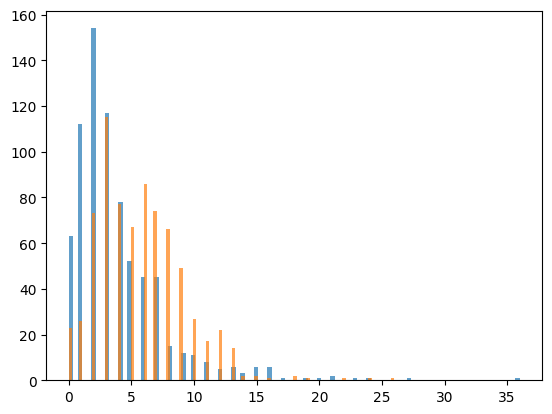

In [19]:
# plot histogram of punct for ham and spam both
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

Split the Data into train test sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2,random_state=0,shuffle=True)

In [22]:
x_train

,message
465,Early bird! Any purchases yet?
1229,Do you want a New Nokia 3510i Colour Phone Del...
1400,Bored housewives! Chat n date now! 0871750.77....
1017,Call from 08702490080 - tells u 2 call 0906635...
425,When are you guys leaving?
...,...
763,Your free ringtone is waiting to be collected....
835,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216,Dorothy@kiefer.com (Bank of Granite issues Str...
559,Hey no I ad a crap nite was borin without ya 2...


In [23]:
y_train

,label
465,ham
1229,spam
1400,spam
1017,spam
425,ham
...,...
763,spam
835,spam
1216,spam
559,ham


Building the Model(Random Forest)

In [24]:
from sklearn.pipeline import Pipeline
# there will be lot of repeated process for training and testing the dataset separatly
# to avoid that we are using pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
# we are importing Tfidf vectorizer to utilize bag of words model in sklearn
from sklearn.ensemble import RandomForestClassifier

In [25]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [26]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

Predicting the Results(random forest)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
y_pred=classifier.predict(x_test)

In [31]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[151,   0],
       [ 13, 135]])

In [32]:
# ham and spam
# spam and ham

In [33]:
# classification report
print(classification_report(y_test, y_pred))
# we are getting almost 95% accuracy

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       151
        spam       1.00      0.91      0.95       148

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [34]:
accuracy_score(y_test, y_pred)
#95.5%

0.9565217391304348

In [35]:
# predict a real message
classifier.predict(['Hi, how are you?'])

array(['ham'], dtype=object)

In [36]:
classifier.predict(['Hope you are doing good and learning new things.'])

array(['ham'], dtype=object)

In [37]:
classifier.predict(['congratulations! you won a lottery ticket worth $1 million ! To claim call on 09061701461.'])

array(['spam'], dtype=object)

4) Building the Model(SVM)

In [38]:
from sklearn.svm import SVC

In [44]:
classifier1 = Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [42]:
classifier1.fit(x_train, y_train)

InvalidParameterError: The 'gamma' parameter of SVC must be a str among {'scale', 'auto'} or a float in the range [0.0, inf). Got 'aujto' instead.

In [45]:
classifier1.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [46]:
classifier1.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

5) Predicting the results

In [47]:
y_pred_svm = classifier1.predict(x_test)

In [48]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[149,   2],
       [ 16, 132]])

In [49]:
accuracy_score(y_test, y_pred_svm)

0.939799331103679

In [50]:
# predict a real message
classifier.predict(['Hi, how are you?'])

array(['ham'], dtype=object)

In [51]:
classifier.predict(['Hope you are doing good and learning new things.'])

array(['ham'], dtype=object)

In [52]:
classifier.predict(['congratulations! you won a lottery ticket worth $1 million ! To claim call on 09061701461.'])

array(['spam'], dtype=object)